# AsaPy

### Asa Prediction

#### Prediction.full_cycle

    """
    Performs the full cycle of the machine learning pipeline: loads or trains the models, preprocesses the input data,
    generates predictions, and post-processes the output data.

    Args:
        X_pred (pandas.DataFrame): Input data to generate predictions for.
        load (bool, optional): If True, loads the trained models from disk instead of training new ones. Default is False.
        **kwargs: Additional keyword arguments passed to either `load_model()` or `train_model()` method.

    Returns:
        pandas.DataFrame: Dataframe with the generated predictions.

    Raises:
        ValueError: If `load` is True and `path` is not provided in `kwargs`.
    """


In [1]:
import asapy
from sklearn.datasets import load_diabetes, load_wine
from sklearn.model_selection import train_test_split

## RandomForest

#### Classification

In [2]:
ml = asapy.AsaML()

In [3]:
# multi_cat classification
X, y  = load_wine(as_frame=True, return_X_y=True)
y = y.to_frame()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [5]:
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'RandomForest', search = True, remove_outlier=True)

Removed 0 rows.

Best hyperparameters: {'bootstrap': False, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 510}


In [6]:
out = out.astype(int)
y_pred = y_pred.astype(int)

In [7]:
diff = out.compare(y_pred)
len(diff)

0

#### Regression

In [8]:
#dataset para regressão com duas colunas target
X, y  = load_diabetes(as_frame=True, return_X_y=True)
y = y.to_frame()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [10]:
ml = asapy.AsaML()
ml.dir_name

'2023_12_19_(18-29-48)'

In [11]:
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'RandomForest', search = True, remove_outlier=True)

Removed 0 rows.

Best hyperparameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 495}


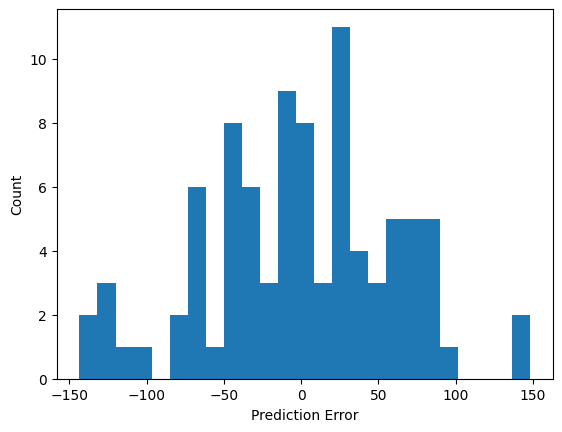

In [12]:
from matplotlib import pyplot as plt
error = out - y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

### Neural Networks

#### Classification

In [13]:
ml = asapy.AsaML()

In [14]:
# multi-cat classification
X, y  = load_wine(as_frame=True, return_X_y=True)
y = y.to_frame()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [16]:
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'NN', search = True, epochs = 500, patience = 10, remove_outlier=True)

Trial 30 Complete [00h 00m 01s]
val_accuracy: 0.3103448152542114

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 35)                490       
                                                                 
 dense_13 (Dense)            (None, 126)               4536      
                                                                 
 dense_14 (Dense)            (None, 205)               26035     
                                                                 
 dense_15 (Dense)            (None, 3)                 618       
                                                                 
Total params: 31679 (123.75 KB)
Trainable params: 31679 (123.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 0s 35ms/step - loss: 1.1146 - accuracy: 0.4556 - val_loss: 0.5360 - val_accuracy: 0.6957
Epoch 2/

/Users/joaodantas/anaconda3/envs/asa/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
out = out.astype(int)
y_pred = y_pred.astype(int)
diff = out.compare(y_pred)
len(diff)

1

#### Regression

In [18]:
# regression with two columns target
X, y  = load_diabetes(as_frame=True, return_X_y=True)
y = y.to_frame()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [20]:
ml = asapy.AsaML()
ml.dir_name

'2023_12_19_(18-31-18)'

In [21]:
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'NN', search = True, epochs = 500, patience = 10, remove_outlier=True)

Trial 30 Complete [00h 00m 01s]
val_loss: 3111.443603515625

Best val_loss So Far: 2827.6806640625
Total elapsed time: 00h 01m 34s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 57)                684       
                                                                 
 dense_12 (Dense)            (None, 116)               6728      
                                                                 
 dense_13 (Dense)            (None, 83)                9711      
                                                                 
 dense_14 (Dense)            (None, 157)               13188     
                                                                 
 dense_15 (Dense)            (None, 1)                 158       
                                                                 
Total params: 30469 (119.02 KB)
Trainable params: 30469 (119.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
8/8 

/Users/joaodantas/anaconda3/envs/asa/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


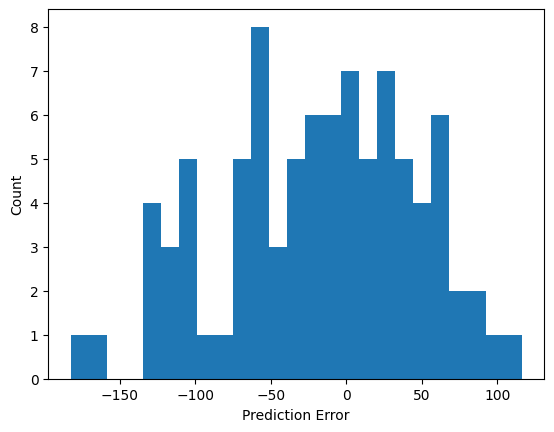

In [22]:
from matplotlib import pyplot as plt
error = out - y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

#### Load model

In [23]:
# regression with two columns target
X, y  = load_diabetes(as_frame=True, return_X_y=True)
y = y.to_frame()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [25]:
ml = asapy.AsaML()

In [26]:
import os 
newest_subfolder = max((sub for sub in os.listdir('models') if os.path.isdir(os.path.join('models', sub))), key=lambda x: os.path.getmtime(os.path.join('models', x)), default=None)

In [27]:
newest_subfolder

'2023_12_19_(18-31-18)'

In [28]:
out = ml.full_cycle(X_test,load = True,  path = f'./models/{newest_subfolder}')

3/3 [==============================] - 0s 711us/step


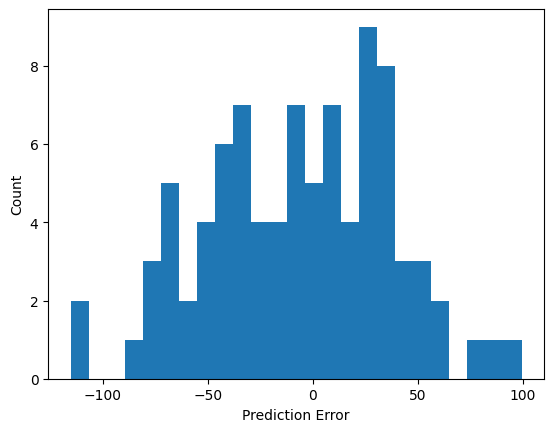

In [29]:
from matplotlib import pyplot as plt
error = out - y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

#### Inserting the hyperparametes

In [30]:
# multi-cat classification
X, y  = load_wine(as_frame=True, return_X_y=True)
y = y.to_frame()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [32]:
ml = asapy.AsaML()

In [33]:
params  = {'n_neurons' : [64,64], 'n_layers' :  2, 'epochs' : 500, 'patience' : 10}
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'NN',search = False, params = params, remove_outlier=True)

Removed 0 rows.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                896       
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 3)                 195       
                                                                 
Total params: 5251 (20.51 KB)
Trainable params: 5251 (20.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 0s 34ms/step - loss: 3.2096 - accuracy: 0.3556 - val_loss: 2.6195 - val_accuracy: 0.3913
Epoch 2/500
3/3 [==============================] - 0s 5ms/step - loss: 2.6742 - accuracy: 0.4222 - val_loss: 2.2987 - val_accur

/Users/joaodantas/anaconda3/envs/asa/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
out = out.astype(int)
y_pred = y_pred.astype(int)
diff = out.compare(y_pred)
len(diff)

0